<img src="https://raw.githubusercontent.com/afo/data-x-plaksha/master/imgsource/dx_logo.png" align="left"></img><br><br><br><br>

## Plaksha Web scraping assignment

---
<a id='sec4'></a>
# Assignment problem


In this week's assignment you should extract live weather data in Mohali for the next 15 days:

[https://weather.com/en-IN/weather/tenday/l/d253814420804f28d49f7a75130e71b797c3c93f9ded842eaf6769e3784da352](https://weather.com/en-IN/weather/tenday/l/d253814420804f28d49f7a75130e71b797c3c93f9ded842eaf6769e3784da352)

* Task scrape
    * day | period (as Wed 11 | Day, Wed 11 | Night etc.)
    * the temperature for the period
    * the short description (e.g. Mostly Clear, Sunny etc.)
    * the long weather description (e.g. Showers late at night. Low 12ºC. Winds SE at 10 to 15 km/h. Chance of rain 40%.)
    
Store the scraped data strings in a Pandas DataFrame



**Hint:** The weather information is found in a div tag with `class_='DailyForecast--DisclosureList--nosQS'`

Your DataFrame should be similar to the below screenshot (with the same columns):<br>
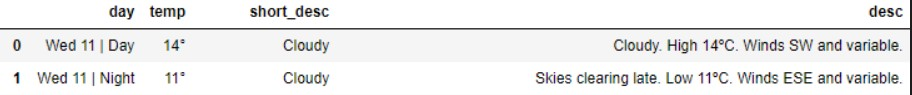

# Assignment solution

# 1. Importing Libraries

In [18]:
import requests
import bs4 as bs
import pandas as pd

# 2. Getting Request

**user-agent**

When you're sending a request to a webpage (no matter if it comes from your computer, iphone, or Python's request package), then you also include a user-agent. This let's the webserver know how to render the contents for you. You can also send user-agent information via a request (to specify who you are for example, or to disguise that you're an automated scraper).

Find your machine's / browser's true user agent by Googling: https://www.google.com/search?q=find+my+user+agent&oq=find+my+user+agent

In [19]:
headers = {'User-Agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/109.0.0.0 Safari/537.36'}
source = requests.get('https://weather.com/en-IN/weather/tenday/l/d253814420804f28d49f7a75130e71b797c3c93f9ded842eaf6769e3784da352', headers=headers)

In [20]:
source

<Response [200]>

In [21]:
source.headers

{'Content-Type': 'text/html; charset=utf-8', 'X-DNS-Prefetch-Control': 'off', 'X-Frame-Options': 'SAMEORIGIN', 'X-Download-Options': 'noopen', 'X-Content-Type-Options': 'nosniff', 'X-XSS-Protection': '1; mode=block', 'webcakes-app-name': 'daily', 'webcakes-app-version': '1.0.0-06bfdfc2cc', 'webcakes-region': 'sjc03', 'ETag': 'W/"1044c5-lkLXH122ep2wLSWs4UZOcWmfbLQ"', 'X-Akamai-Transformed': '9 - 0 pmb=mTOE,4mRUM,1', 'Content-Encoding': 'gzip', 'Expires': 'Fri, 20 Jan 2023 06:31:29 GMT', 'Cache-Control': 'max-age=0, no-cache', 'Pragma': 'no-cache', 'Date': 'Fri, 20 Jan 2023 06:31:29 GMT', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive, Transfer-Encoding', 'Vary': 'Accept-Encoding', 'Set-Cookie': 'speedpin=4G; expires=Fri, 20-Jan-2023 07:01:29 GMT; path=/; domain=.weather.com; secure, ci=TWC-Connection-Speed=4G&TWC-Locale-Group=GLS+&TWC-Device-Class=desktop&X-Origin-Hint=PROD-IBM-Daily&TWC-Network-Type=wifi&TWC-GeoIP-Country=US&TWC-GeoIP-Lat=39.0438&TWC-GeoIP-Long=-77.4879&Akam

# 3. Scraping

In [22]:
soup = bs.BeautifulSoup(source.content, features = 'html.parser')

Creating dictionary for the 4 columns to be created in the dataframe

In [23]:
data = {'day':[], 'temp':[], 'short_desc':[], 'desc':[]}

The required data such as day, temperature, short description and long description is scraped by inspecting the weather site and finding the relevant class name.<br>
I used the following four highlighted elements to scrape the data.<br>
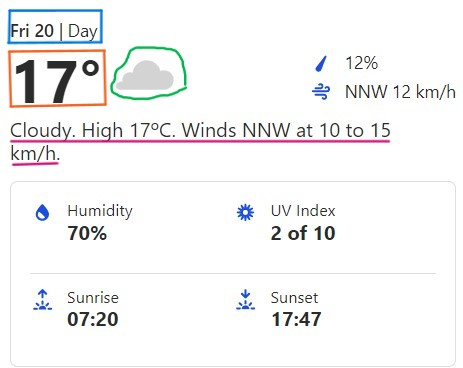

Using html attribute 'class' and for loop to find all the 15 days (and night) data related to the weather.

In [24]:
for d in soup.find_all(class_ = 'DailyContent--daypartName--3emSU'):
    data['day'].append(d.text)

In [25]:
for t in soup.find_all(class_ = 'DailyContent--temp--1s3a7'):
    data['temp'].append(t.text)

In [26]:
for sd in soup.find_all(class_ = 'DailyContent--weatherIcon--Kh7Ru'):
    data['short_desc'].append(sd.text)

In [27]:
for des in soup.find_all(class_ = 'DailyContent--narrative--3Ti6_'):
    data['desc'].append(des.text)

# 4. Output

In [28]:
pd.DataFrame(data = data)

,day,temp,short_desc,desc
0,Fri 20 | Day,17°,Cloudy,Cloudy. High 17ºC. Winds NNW at 10 to 15 km/h.
1,Fri 20 | Night,9°,Partly Cloudy Night,Partly cloudy. Low 9ºC. Winds N and variable.
2,Sat 21 | Day,20°,Sunny,Generally clear. High 20ºC. Winds W and variable.
3,Sat 21 | Night,8°,Clear Night,Generally clear. Low 8ºC. Winds N and variable.
4,Sun 22 | Day,21°,Sunny,Generally clear. High 21ºC. Winds NW and varia...
5,Sun 22 | Night,9°,Mostly Clear Night,Generally clear. Low 9ºC. Winds NNE and variable.
6,Mon 23 | Day,20°,Partly Cloudy,Partly cloudy. High 20ºC. Winds NW and variable.
7,Mon 23 | Night,11°,Scattered Showers Night,Showers late at night. Low 11ºC. Winds NNE and...
8,Tue 24 | Day,20°,Partly Cloudy,Partly cloudy. High 20ºC. Winds SE at 10 to 15...
9,Tue 24 | Night,12°,Scattered Thunderstorms Night,Scattered thunderstorms. Low 12ºC. Winds ESE a...
